<h1> Exploratory Data Analysis </h1>

This noteobok serves as of an overview of what kind of metrics can be measured from this dataset.


Enjoy!

<h2> Importing Libraries and Datasets </h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from pandasql import sqldf

In [2]:
df_men_roster = pd.read_csv('/Users/zakirpasha/Desktop/Z/Projects/Volleyball-Nations-League/Mens/df_mens_rosters_21_23.csv')
df_men_indv = pd.read_csv('/Users/zakirpasha/Desktop/Z/Projects/Volleyball-Nations-League/Mens/df_mens_indv_21_23.csv')
df_women_roster = pd.read_csv('/Users/zakirpasha/Desktop/Z/Projects/Volleyball-Nations-League/Womens/df_womens_rosters_21_23.csv')
df_women_indv = pd.read_csv('/Users/zakirpasha/Desktop/Z/Projects/Volleyball-Nations-League/Womens/df_womens_indv_21_23.csv')

In [3]:
##Creating gender column to use 1 dataset instead of two different ones.

df_men_roster['Gender'] = 'Male'
df_women_roster['Gender'] = 'Female'
df_rosters = pd.concat([df_men_roster, df_women_roster], ignore_index=True)
df_rosters.head(3)

,No.,Player Name,Position,Player_ID,Year,Country_Name,Nationality,Age,Height,Total Points,...,Attack Points,Efficiency,Attack Avg Points,Block Points,Block Success,Block Avg Points,Serve Points,Serve Success,Serve Avg Points,Gender
0,1.0,Sanchez Matias,S,142412.0,2021,Argentina,Argentina,25.0,175.0,4,...,2,100%,0.29,0,0.00%,0.00,2,6.90%,0.29,Male
1,2.0,Pereyra Federico,O,117445.0,2021,Argentina,Argentina,33.0,200.0,147,...,125,49.21%,8.33,12,26.09%,0.80,10,8.93%,0.67,Male
2,3.0,Martinez Franchi Jan,U,142410.0,2021,Argentina,Argentina,24.0,190.0,53,...,51,42.15%,4.25,2,13.33%,0.17,0,0.00%,0.00,Male


In [4]:
##Creating gender column to use 1 dataset instead of two different ones.

df_men_indv['Gender'] = 'Male'
df_women_indv['Gender'] = 'Female'
df_indv = pd.concat([df_men_indv, df_women_indv], ignore_index=True)
df_indv.head(3)

,Player_ID,Year,TeamA,TeamB,Serve_Points,Serve_Errors,Serve_Attempts,Total_Serves,Match_Date,Set_Successes,...,Total_Blocks,Reception_Successful,Reception_Errors,Reception_Attemps,Total_Receptions,Dig_Success,Dig_Errors,Dig_Attempts,Total_Digs,Gender
0,142412,2021,Iran,Argentina,0,0,0,0,23/06/2021,2,...,0,0,0,0,0,1,0,0,1,Male
1,142412,2021,France,Argentina,0,0,1,1,22/06/2021,2,...,0,0,0,0,0,0,0,0,0,Male
2,142412,2021,Argentina,Serbia,1,1,11,13,17/06/2021,25,...,0,0,0,0,0,5,0,1,6,Male


________________________________________________________________________________________________________________________________________________________________________________________________________________

<h2> Summary Statistics </h2>

In [5]:
df_rosters.describe(include='all')

#We should expect the counts to be different due to Coaches have no information aside from Year and Name!

,No.,Player Name,Position,Player_ID,Year,Country_Name,Nationality,Age,Height,Total Points,...,Attack Points,Efficiency,Attack Avg Points,Block Points,Block Success,Block Avg Points,Serve Points,Serve Success,Serve Avg Points,Gender
count,1775.000000,1871,1871,1775.000000,1871.000000,1871,1775,1775.000000,1775.0,1775,...,1775,1775,1775,1775,1775,1775,1775,1775,1775,1871
unique,NaN,1152,7,NaN,NaN,24,24,NaN,91.0,221,...,193,742,502,52,437,165,30,500,111,2
top,NaN,Sanchez Matias,OH,NaN,NaN,Poland,Poland,NaN,200.0,0,...,0,-,-,0,-,-,0,-,-,Male
freq,NaN,3,565,NaN,NaN,121,116,NaN,66.0,291,...,328,488,488,436,498,498,529,459,459,941
mean,14.503662,NaN,NaN,151456.791549,2021.952432,NaN,NaN,26.428169,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,11.897479,NaN,NaN,19423.179650,0.746746,NaN,NaN,4.193636,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,112366.000000,2021.000000,NaN,NaN,16.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.000000,NaN,NaN,138381.500000,2021.000000,NaN,NaN,23.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,13.000000,NaN,NaN,152168.000000,2022.000000,NaN,NaN,26.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,20.000000,NaN,NaN,164021.000000,2023.000000,NaN,NaN,29.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_indv.describe(include='all')

#We should expect the counts to be different due to Coaches have no information aside from Year and Name!

,Player_ID,Year,TeamA,TeamB,Serve_Points,Serve_Errors,Serve_Attempts,Total_Serves,Match_Date,Set_Successes,...,Total_Blocks,Reception_Successful,Reception_Errors,Reception_Attemps,Total_Receptions,Dig_Success,Dig_Errors,Dig_Attempts,Total_Digs,Gender
count,17782.000000,17782.000000,17567,17567,17782,17782,17782,17782,17782,17763,...,17782,17767,17767,17767,17767,17782,17782,17782,17782,17782
unique,NaN,NaN,24,24,11,11,29,34,124,67,...,33,32,10,49,63,31,18,14,40,2
top,NaN,NaN,Japan,Italy,0,0,0,0,23/06/2021,0,...,0,0,0,0,0,0,0,0,0,Female
freq,NaN,NaN,1428,1436,13766,10041,6809,6545,224,15152,...,8055,12171,14157,10650,10063,7187,9869,12645,6204,8892
mean,149508.563885,2021.903892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,18863.651302,0.809953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,112366.000000,2021.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,136867.000000,2021.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,151195.000000,2022.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,163141.000000,2023.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h2> Distribution of Player Ages </h2>

By Year and Gender

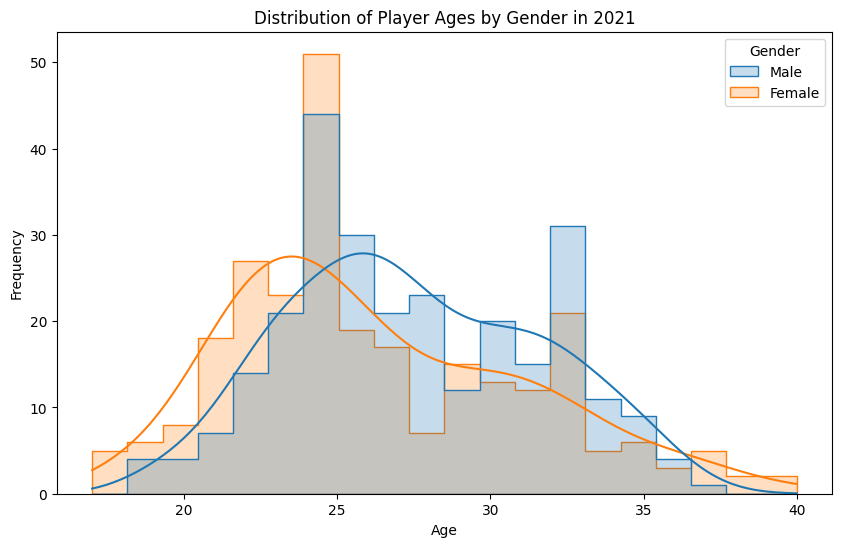

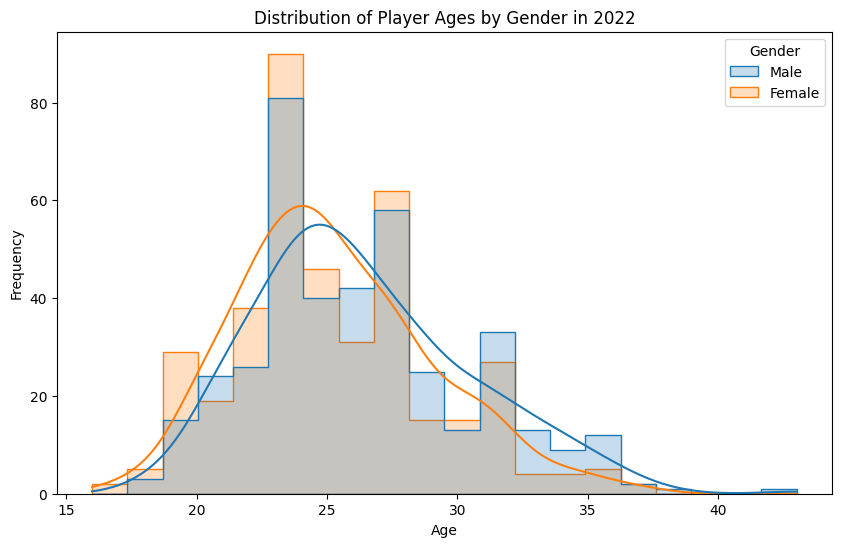

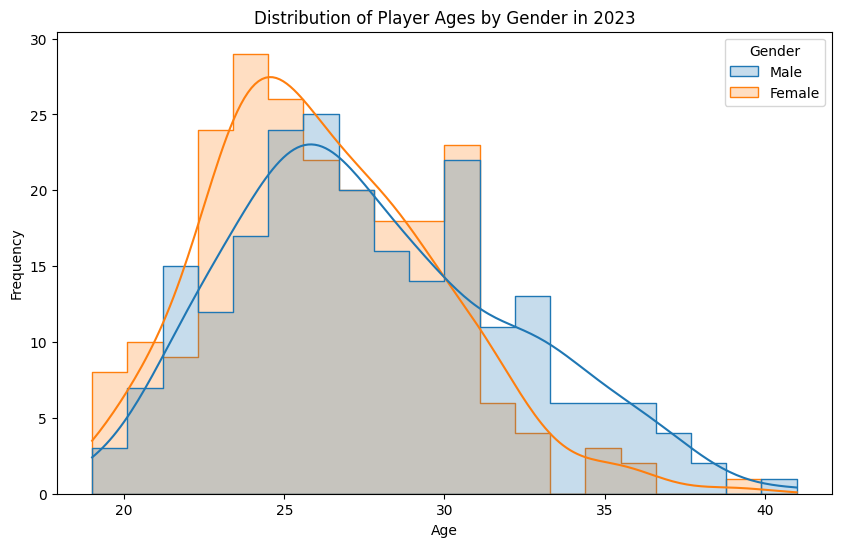

In [7]:
# Filter the dataset for unique years, assuming relatively few unique years for visualization purposes
unique_years = df_rosters['Year'].unique()

# Plotting the distribution of player ages by gender for each unique year in the dataset
for year in sorted(unique_years)[:3]: 
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_rosters[df_rosters['Year'] == year], x='Age', hue='Gender', bins=20, kde=True, element="step")
    plt.title(f'Distribution of Player Ages by Gender in {year}')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

<h1> Total Points by Country and Year </h1>

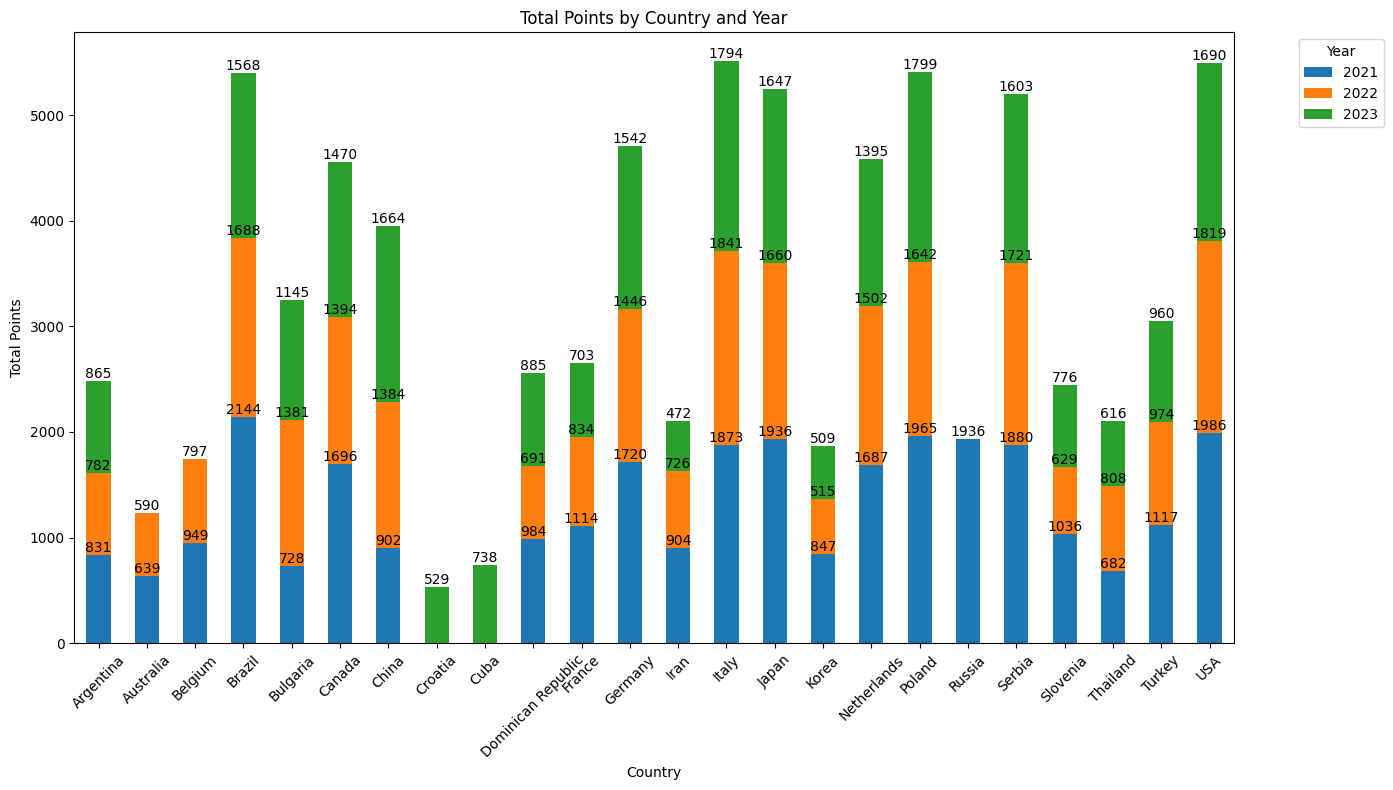

In [8]:
df_rosters['Total Points'] = pd.to_numeric(df_rosters['Total Points'], errors='coerce')

# Calculate Total Points by Country and Year
total_points_by_country_year = df_rosters.groupby(['Country_Name', 'Year'])['Total Points'].sum().unstack().fillna(0)

# Plot
ax = total_points_by_country_year.plot(kind='bar', figsize=(14, 8), stacked=True)
plt.title('Total Points by Country and Year')
plt.xlabel('Country')
plt.ylabel('Total Points')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)


for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0:  
        ax.annotate(f'{height:.0f}', (x + width/2, y + height), ha='center', va='bottom')

plt.tight_layout()
plt.show()


<h1> Avg. Points by Position/Year </h1>

<h2> Men </h2>

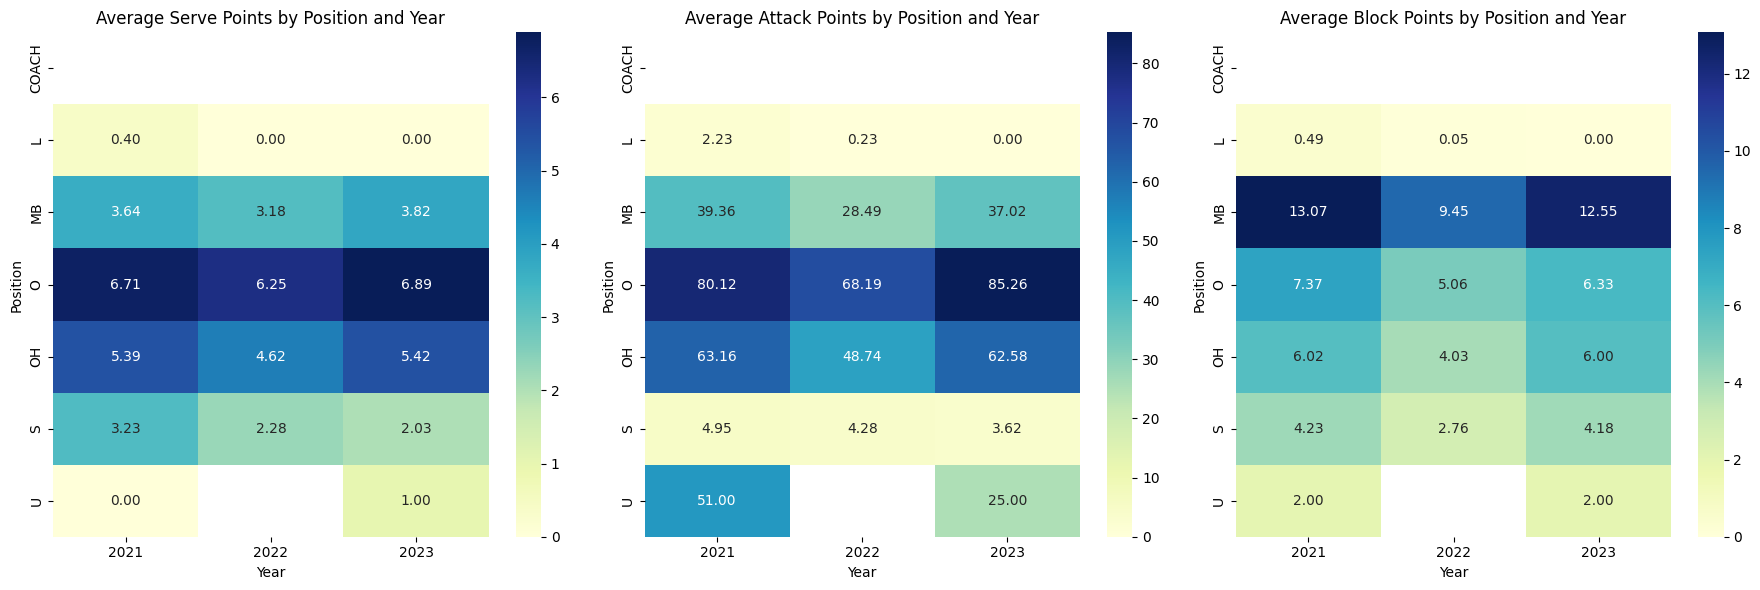

In [9]:
df_men = df_rosters[df_rosters['Gender'] == 'Male'].copy()

# Convert columns to numeric types
df_men['Serve Points'] = pd.to_numeric(df_men['Serve Points'], errors='coerce')
df_men['Attack Points'] = pd.to_numeric(df_men['Attack Points'], errors='coerce')
df_men['Block Points'] = pd.to_numeric(df_men['Block Points'], errors='coerce')

stats_summary = df_men.groupby(['Position', 'Year'])[['Serve Points', 'Attack Points', 'Block Points']].mean().reset_index()

pivot_serve = stats_summary.pivot(index="Position", columns="Year", values="Serve Points")
pivot_attack = stats_summary.pivot(index="Position", columns="Year", values="Attack Points")
pivot_blocks = stats_summary.pivot(index="Position", columns="Year", values="Block Points")

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.heatmap(pivot_serve, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Average Serve Points by Position and Year')

plt.subplot(1, 3, 2)
sns.heatmap(pivot_attack, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Average Attack Points by Position and Year')

plt.subplot(1, 3, 3)
sns.heatmap(pivot_blocks, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Average Block Points by Position and Year')

plt.tight_layout()
plt.show()


<h2> Women </h2>

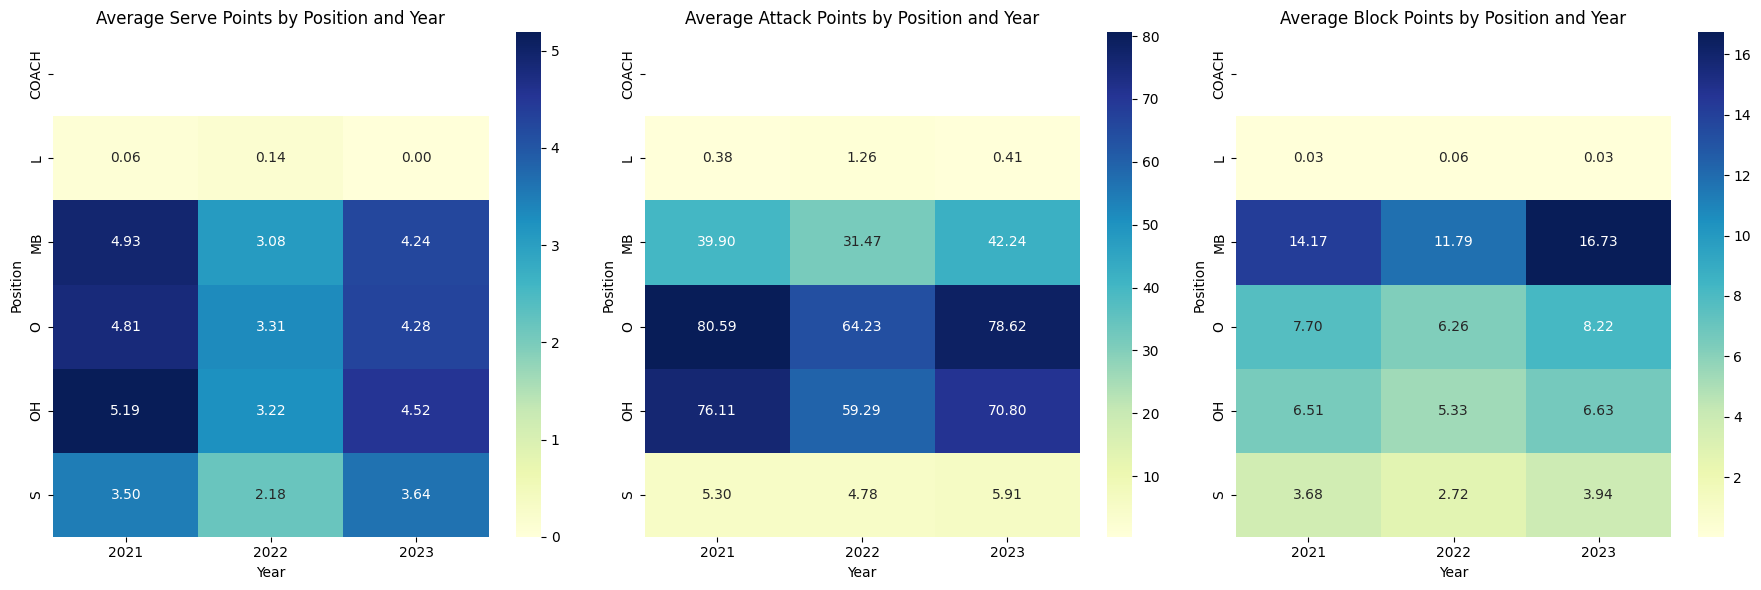

In [10]:
df_women = df_rosters[df_rosters['Gender'] == 'Female'].copy()

#Convert columns to numeric types
df_women['Serve Points'] = pd.to_numeric(df_women['Serve Points'], errors='coerce')
df_women['Attack Points'] = pd.to_numeric(df_women['Attack Points'], errors='coerce')
df_women['Block Points'] = pd.to_numeric(df_women['Block Points'], errors='coerce')

stats_summary = df_women.groupby(['Position', 'Year'])[['Serve Points', 'Attack Points', 'Block Points']].mean().reset_index()

pivot_serve = stats_summary.pivot(index="Position", columns="Year", values="Serve Points")
pivot_attack = stats_summary.pivot(index="Position", columns="Year", values="Attack Points")
pivot_blocks = stats_summary.pivot(index="Position", columns="Year", values="Block Points")

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.heatmap(pivot_serve, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Average Serve Points by Position and Year')

plt.subplot(1, 3, 2)
sns.heatmap(pivot_attack, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Average Attack Points by Position and Year')

plt.subplot(1, 3, 3)
sns.heatmap(pivot_blocks, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Average Block Points by Position and Year')

plt.tight_layout()
plt.show()


<h1> Top Players by Metric in 2023 </h1>

<h2> Men </h2>

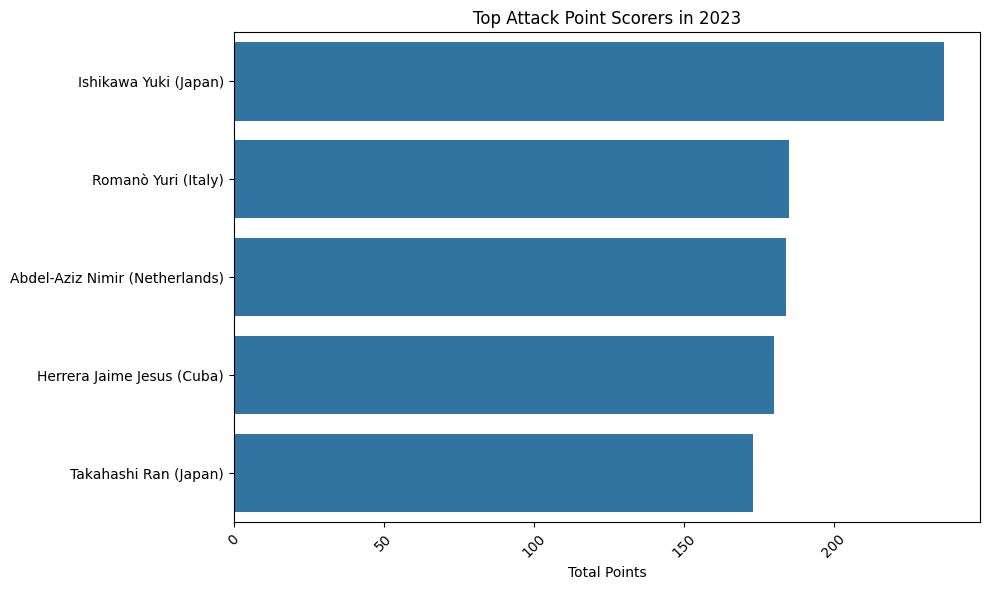

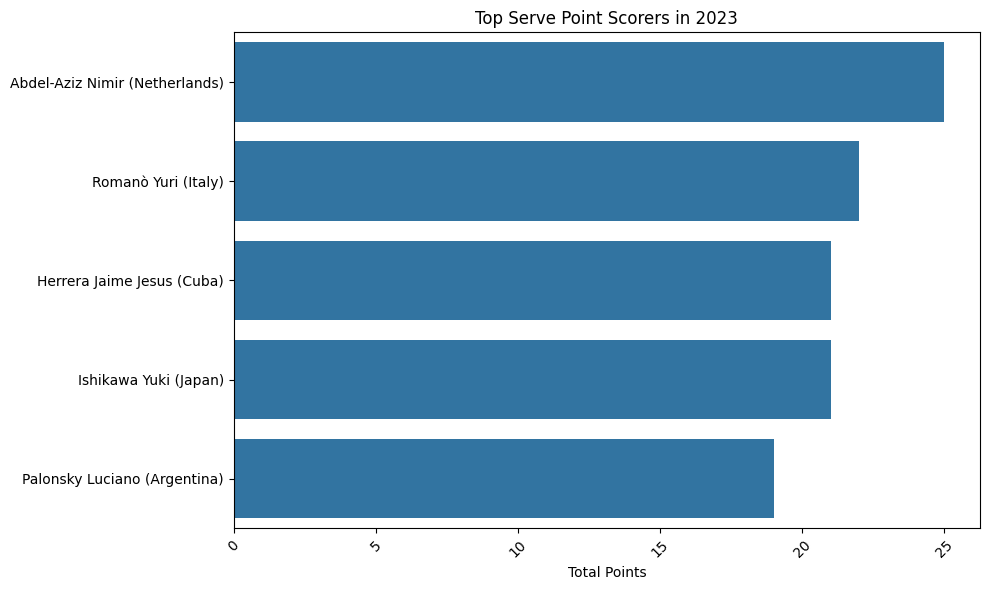

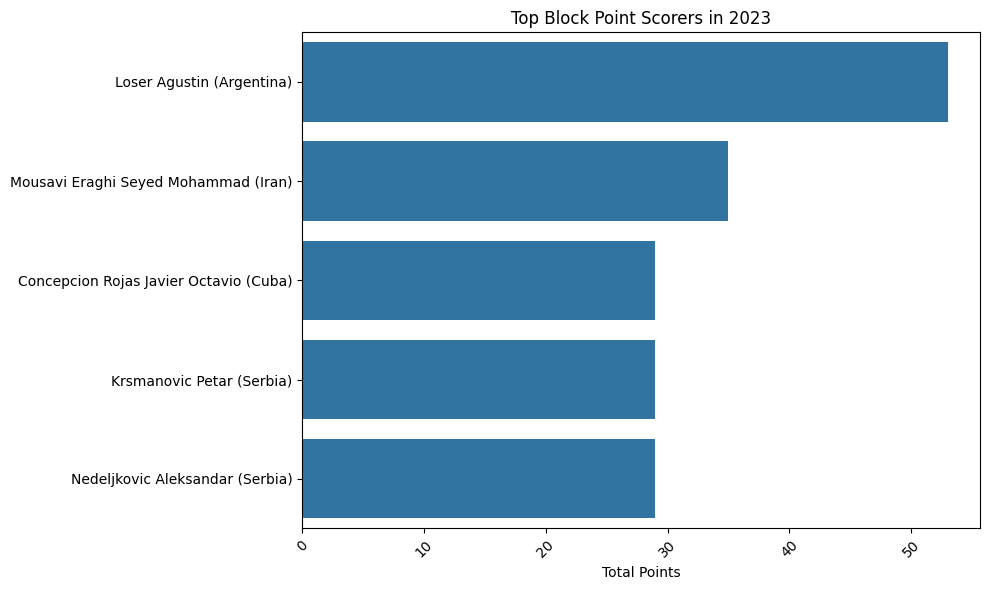

In [11]:
def plot_top_performers(df, category, title, year=None):
    if year:
        df_filtered = df[df['Year'] == year].copy()
    else:
        df_filtered = df.copy()
    
    df_filtered[category] = pd.to_numeric(df_filtered[category], errors='coerce')
    
    # Creating a combined 'Player with Country' column for viz purposes
    df_filtered['Player with Country'] = df_filtered['Player Name'] + ' (' + df_filtered['Country_Name'] + ')'
    
    # Calculate the sum and then find the top performers
    top_performers = df_filtered.groupby('Player with Country')[category].sum().dropna().nlargest(5).reset_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=category, y='Player with Country', data=top_performers)
    plt.title(title)
    plt.xlabel('Total Points')
    plt.ylabel('')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_top_performers(df_men, 'Attack Points', 'Top Attack Point Scorers in 2023', year=2023)
plot_top_performers(df_men, 'Serve Points', 'Top Serve Point Scorers in 2023', year=2023)
plot_top_performers(df_men, 'Block Points', 'Top Block Point Scorers in 2023', year=2023)

<h2> Women </h2>

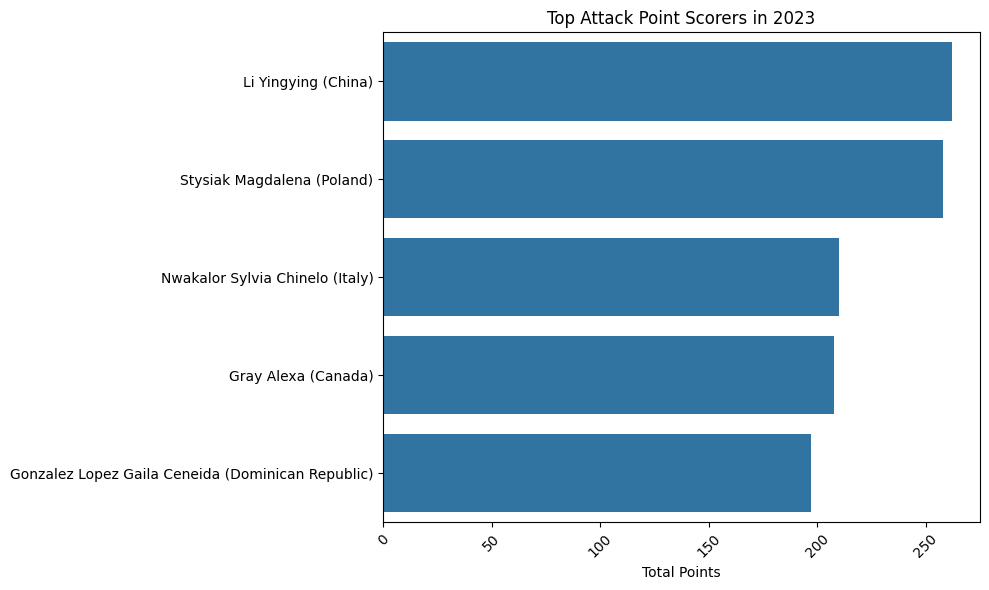

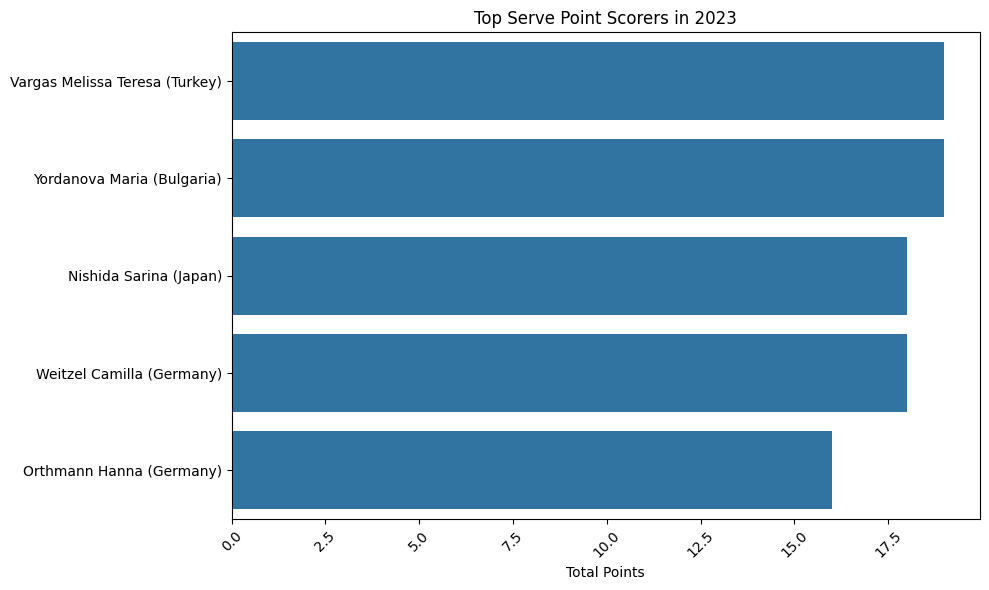

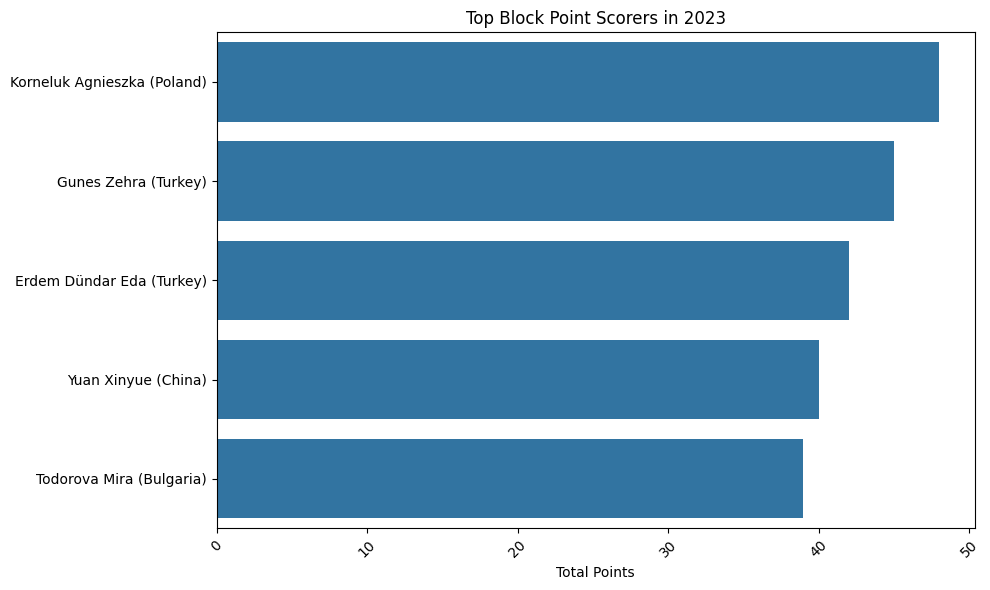

In [12]:
def plot_top_performers(df, category, title, year=None):
    if year:
        df_filtered = df[df['Year'] == year].copy()
    else:
        df_filtered = df.copy()
    
    # Ensure the category column is treated as numeric. Using the copy, so it's safe to modify.
    df_filtered[category] = pd.to_numeric(df_filtered[category], errors='coerce')
    
    # Creating a combined 'Player with Country' column for viz purposes
    df_filtered['Player with Country'] = df_filtered['Player Name'] + ' (' + df_filtered['Country_Name'] + ')'
    
    top_performers = df_filtered.groupby('Player with Country')[category].sum().dropna().nlargest(5).reset_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=category, y='Player with Country', data=top_performers)
    plt.title(title)
    plt.xlabel('Total Points')
    plt.ylabel('')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_top_performers(df_women, 'Attack Points', 'Top Attack Point Scorers in 2023', year=2023)
plot_top_performers(df_women, 'Serve Points', 'Top Serve Point Scorers in 2023', year=2023)
plot_top_performers(df_women, 'Block Points', 'Top Block Point Scorers in 2023', year=2023)

<h1> SQL Question/Answer </h1>

In [13]:
#Creating SQL Function
pysqldf = lambda q: sqldf(q, globals())

<h2> 1. For Men and Women, how many players were on each team per year? </h2>

In [14]:
sql_query = """
select 
    Year,
    Gender,
    Country_Name,
    count(distinct Player_ID) as players
from 
    df_rosters
group by 1,2,3
"""

result_df = pysqldf(sql_query)
result_df

,Year,Gender,Country_Name,players
0,2021,Female,Belgium,16
1,2021,Female,Brazil,18
2,2021,Female,Canada,17
3,2021,Female,China,15
4,2021,Female,Dominican Republic,15
...,...,...,...,...
91,2023,Male,Netherlands,14
92,2023,Male,Poland,14
93,2023,Male,Serbia,14
94,2023,Male,Slovenia,14


<h2> 2. Which countries had both a male and a female team in the 2021 and 2022 season? </h2>

In [15]:
sql_query = """
select 
    Country_Name
from 
    df_rosters
where Year in ('2021','2022')
group by 1
having count(distinct Gender) > 1;
"""
result_df = pysqldf(sql_query)
result_df

,Country_Name
0,Brazil
1,Bulgaria
2,Canada
3,China
4,Germany
5,Italy
6,Japan
7,Netherlands
8,Poland
9,Russia


<h2> 3. Which players have a different Nationality than the country they're playing for? </h2>

In [16]:
sql_query = """
select 
    "Player Name",
    Nationality,
    Country_Name as Team
from 
    df_rosters
where 
    Country_Name != Nationality
"""
result_df = pysqldf(sql_query)
result_df

,Player Name,Nationality,Team
0,Solé Sebastian,Italy,Argentina
1,Sobolska-Tarasova Dominika,Poland,Belgium


<h2> 4. Which countries did USA (men's) play in 2021? </h2>

In [17]:
sql_query = """
with usa as (
select 
    *
from 
    df_rosters 
where 
    Country_Name = 'USA'
and 
    Year = '2021'
and 
    Gender = 'Male'),
    
stats as (
select 
    a.Player_ID,
    b.*
from 
    usa a 
left join df_indv b 
on a.Player_ID = b.Player_ID and a.Year = b.Year),

teama as (
select 
    TeamA,
    count(*)
from 
    stats 
where 
    TeamA != 'USA'
group by 1),

teamb as (
select 
    TeamB,
    count(*)
from 
    stats 
where 
    TeamB != 'USA'
group by 1),

main as (
select * from TeamA
union all 
select * from TeamB)

select 
    distinct TeamA
from 
    main;
    
    
    
    
"""
result_df = pysqldf(sql_query)
result_df

,TeamA
0,Bulgaria
1,Germany
2,Iran
3,Italy
4,Netherlands
5,Poland
6,Russia
7,Slovenia
8,Argentina
9,Australia


<h2> 5. For each year, who was the tallest and shortest players per position (womens)? </h2>

In [18]:
sql_query = """

with pos as (
select 
    Year,
    Position,
    max(Height) as max_height,
    min(Height) as min_height
from 
    df_rosters 
where 
    Position != 'COACH'
and 
    Gender = 'Female'
and 
    Height != '-'
group by 1,2),

max_info as (
select 
    a.Year,
    a.Position,
    b."Player Name",
    b.Height
from 
    pos a 
left join 
    df_rosters b 
on a.Year = b.Year and a.Position = b.Position and a.max_height = b.Height
where b.Gender = 'Female'
order by 1,2),

min_info as (
select 
    a.Year,
    a.Position,
    b."Player Name",
    b.Height
from 
    pos a 
left join 
    df_rosters b 
on a.Year = b.Year and a.Position = b.Position and a.min_height = b.Height
where b.Gender = 'Female'
order by 1,2),

main as (
select * from max_info
union all
select * from min_info)

select * from main order by Year, Position, Height
 
"""
result_df = pysqldf(sql_query)
result_df

,Year,Position,Player Name,Height
0,2021,L,Inoue Kotoe,163
1,2021,L,Bujan Cassandra,186
2,2021,MB,Sang-Ob Tirawan,176
3,2021,MB,Yuan Xinyue,202
4,2021,O,Nwakalor Sylvia Chinelo,176
5,2021,O,Stysiak Magdalena,203
6,2021,OH,Juangjan Pattiya,172
7,2021,OH,Martinez Brayelin Elizabeth,201
8,2021,S,ManaKij Sirima,168
9,2021,S,Matveeva Polina,194


<h2> 6. In 2023, which position had the second most set attempts? (mens) </h2>

In [19]:
sql_query = """

with id as (select 
    Player_ID,
    sum(Set_Attempts) as set_attempts
from 
    df_indv
where 
    Year = '2023'
and 
    Gender = 'Male'
group by 1),

roster as (
select 
    Position,
    Player_Id
from 
    df_rosters
where 
    Gender = 'Male'
and 
    Year = '2023'),
    
temp as (
select 
    Position,
    sum(set_attempts) as set_attempts 
from 
    id a 
left join roster b 
on a.Player_id = b.Player_id
group by 1
),

base as (
select 
    Position,
    set_attempts,
    row_number() over (order by set_attempts desc) row
from 
    temp)

select * from base where row = 2
 
"""
result_df = pysqldf(sql_query)
result_df

,Position,set_attempts,row
0,OH,1339,2


<h2> 7. Which countries have had the same coach year over year? (womens) </h2>

In [20]:
sql_query = """

with base as (
select 
    Year,
    Country_Name,
    "Player Name" as Coach
from 
    df_rosters 
where 
    Position = 'COACH'
and Gender = 'Female')

select 
    Country_Name
from 
    base 
group by 1
having count(distinct Coach) = 1
"""
result_df = pysqldf(sql_query)
result_df

,Country_Name
0,Belgium
1,Bulgaria
2,Croatia
3,Dominican Republic
4,Russia
5,USA


<h2> 8. Which middle blockers (MB) had more blocks than attacks in 2021 for Men? </h2>

In [21]:
sql_query = """

with block as (
select 
    "Player Name" as name,
    sum("Block Points") as blocks,
    sum("Attack Points") as attacks
from 
    df_rosters 
where 
    Gender = "Male"
and 
    Year = "2021"
and 
    Position = "MB"
group by 1)

select * from block where blocks > attacks

"""
result_df = pysqldf(sql_query)
result_df

,name,blocks,attacks
0,Abedini Reza,9,8
1,Štalekar Sašo,3,2


<h2> 9. Were there any liberos on the mens or womens side that had an attack point? </h2>

In [22]:
sql_query = """

select 
    Year,
    "Player Name",
    Gender,
    Country_Name
from 
    df_rosters 
where 
    Position = "L"
and 
    "Attack Points" > 0
order by 1,2

"""
result_df = pysqldf(sql_query)
result_df

,Year,Player Name,Gender,Country_Name
0,2021,Andringa Robbert,Male,Netherlands
1,2021,Apinyapong Wilavan,Female,Thailand
2,2021,Chaisri Tapaphaipun,Female,Thailand
3,2021,Marshall Steven,Male,Canada
4,2021,Sossenheimer David,Male,Germany
5,2022,Bock Linda,Female,Germany
6,2022,Klobucar Jan,Male,Slovenia
7,2022,Rabit Esthefany,Female,Dominican Republic
8,2022,Reesink Florien,Female,Netherlands
9,2022,Uchiseto Mami,Female,Japan


<h1> 10. Calculate Team USA's (men) Hitting Percentage for the 2022 Season. </h1>

(points - errors)/attempts

In [23]:
sql_query = """

with ids as (
select 
    Player_ID,
    Year
from 
    df_rosters 
where 
    country_name = 'USA'
and 
    Year = '2022'
and 
    Gender = 'Male'
and 
    Position != 'COACH'),

base as (
select 
    sum(Attack_Success) as points,
    sum("Attack Errors") as errors,
    sum(Attack_Attempts) as attempts 
from 
    ids a 
left join df_indv b 
on a.Player_id = b.Player_id and a.Year = b.Year)

select
    (points - errors) / (points+errors+attempts)
from 
    base
    

"""
result_df = pysqldf(sql_query)
result_df

,(points - errors) / (points+errors+attempts)
0,0.411847
